In [2]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [3]:
def pseudo_random_number_generator(seed, a, b, c):
    yield 1

In [4]:
import random
random.seed(10)
print(random.random())
print(random.random())
print(random.random())
print(random.random())

0.5714025946899135
0.4288890546751146
0.5780913011344704
0.20609823213950174


In [5]:
volumen_cubo = 1 * 1 * 1

N = 1000000
count = 0
for j in range(N):
    point = np.array([random.random(), random.random(), random.random()])  # Un punto al azar, random() genera valores entre 0-1
    if sum(point**2) < 1:  # x^2 + y^2 + z^2 < 1 ¿Esta dentro?
        count = count + 1
        
fraccion = float(count)/float(N)

volumen = fraccion * volumen_cubo

volumen_esfera = volumen * 8 

In [6]:
volumen_esfera

4.195488

In [7]:
volumen = (4.0/3)*math.pi
volumen

4.1887902047863905

In [8]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import random

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [46]:
# Inicialización

steps = 200

posicion = np.zeros([steps])

tiempo = range(steps)

In [47]:
# caminamos ...
for i in range(1,steps):
    if random.choice([u'adelante', u'atrás']) == u'atrás':
        posicion[i] = posicion[i-1] - 1
    else:
        posicion[i] = posicion[i-1] + 1

Text(0, 0.5, 'posición')

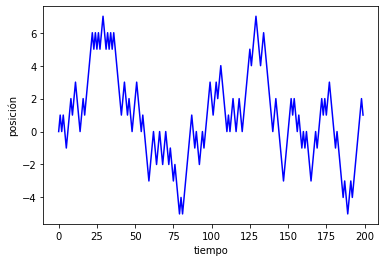

In [48]:
plt.plot(tiempo,posicion, 'b-')
plt.xlabel('tiempo')
plt.ylabel(u'posición')

In [50]:
# Inicialización

pasos = 200
borrachos = 2000

posicion = np.zeros([borrachos, pasos])  # todos empiezan en ceros
tiempo = range(pasos)

for borracho in range(borrachos):
    for paso in range(1, pasos):
        if random.choice(['adelante', u'atrás']) == u'atrás':
            posicion[borracho, paso] = posicion[borracho,paso - 1] - 1
        else:
            posicion[borracho, paso] = posicion[borracho,paso - 1] + 1
            

promedio = np.mean(posicion, axis=0) # promedio
rms = np.sqrt(np.mean(np.square(posicion), axis=0)) # media cuadrática 
        

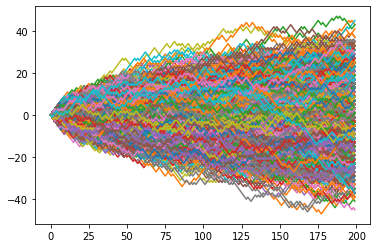

In [51]:
# Todos los borrachos a la vez
for borracho in range(borrachos):
    plt.plot(tiempo, posicion[borracho, :], '-')

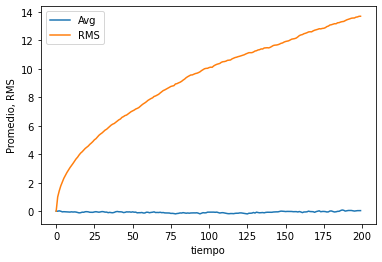

In [16]:
plt.plot(tiempo, promedio, label='Avg')
plt.plot(tiempo, rms, label='RMS')
plt.xlabel('tiempo')
plt.ylabel('Promedio, RMS')
plt.legend(loc='best')

In [19]:
from scipy.optimize import curve_fit

power_law = lambda x, a, b: a*x**b

popt, pcov = curve_fit(power_law, tiempo, rms)

In [21]:
print ("A = %f +/- %f." % (popt[0], sqrt(pcov[0,0])))
print ("B = %f +/- %f." % (popt[1], sqrt(pcov[1,1])))

A = 1.099959 +/- 0.007461.
B = 0.477552 +/- 0.001410.


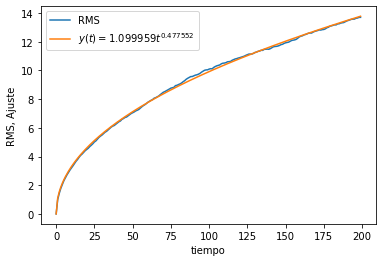

In [22]:
plt.plot(tiempo, rms, label="RMS")
plt.plot(tiempo,power_law(tiempo, popt[0], popt[1]), label=r"$y(t) = %f t ^{%f}$" % (popt[0], popt[1]))
plt.xlabel('tiempo')
plt.ylabel(r'RMS, Ajuste')
plt.legend(loc='best')

(0.0, 200.0)

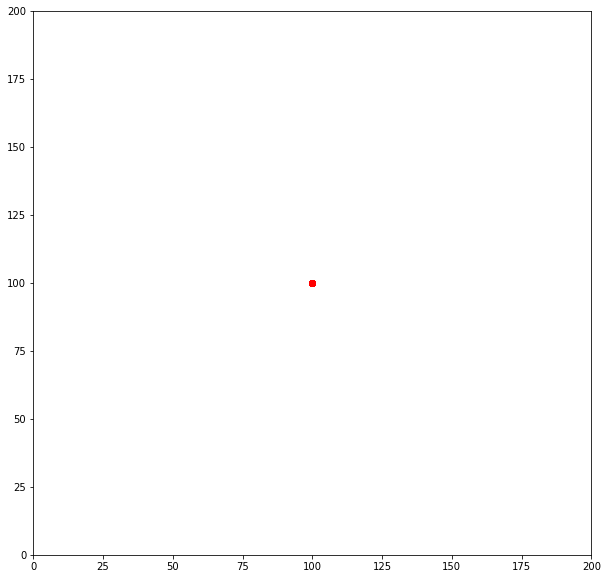

In [32]:
plt.figure(figsize = (10,10))

num_particulas = 400

particulas = np.ones([num_particulas,2])*100  # Todas las partículas en el punto (100,100)


# Dibujamos la posición inicial
line, = plt.plot(particulas[:,0], particulas[:,1], 'ro')
plt.xlim(0,200)
plt.ylim(0,200)


In [42]:
steps = 5000

for i in range(steps):
    for particula in range(num_particulas):
        particulas[particula, 0] += random.randint(-1, 1)
        particulas[particula, 1] += random.randint(-1, 1)
        
        # Verificar colisión
        x, y = (particulas[particula, 0], particulas[particula, 1])
        if x == 200:
            particulas[particula, 0] = 198
        elif x == 0:
            particulas[particula, 0] = 2
        
        if y == 200:
            particulas[particula, 1] = 198
        elif y == 0:
            particulas[particula, 1] = 2

(0.0, 200.0)

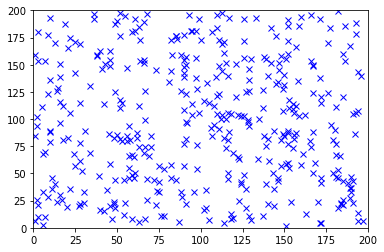

In [43]:
# Dibujamos la posición luego de N steps
line, = plt.plot(particulas[:,0], particulas[:,1], 'bx')
plt.xlim(0,200)
plt.ylim(0,200)

In [52]:
# Inicialización

pasos = 200
borrachos = 2000

posicion = np.zeros([borrachos, pasos])  # todos empiezan en ceros
tiempo = range(pasos)

for borracho in range(borrachos):
    for paso in range(1, pasos):
        if random.choice(['adelante', u'atrás']) == u'atrás':
            posicion[borracho, paso] = posicion[borracho,paso - 1] - 2
        else:
            posicion[borracho, paso] = posicion[borracho,paso - 1] + 1
            

promedio = np.mean(posicion, axis=0) # promedio
rms = np.sqrt(np.mean(np.square(posicion), axis=0)) # media cuadrática 
        

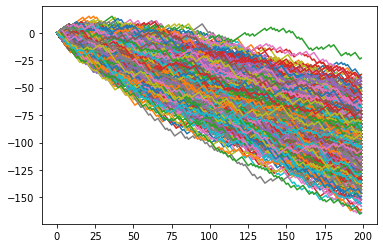

In [53]:
# Todos los borrachos a la vez
for borracho in range(borrachos):
    plt.plot(tiempo, posicion[borracho, :], '-')